### EigenPhi bid value simple anlysis 
Extract all bid csv from the page: https://bidarchive.relayscan.io/ethereum/mainnet/2024-06/index.html


In [17]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
import re

# URL of the page containing the ZIP file links
index_url = "https://bidarchive.relayscan.io/ethereum/mainnet/2024-06/index.html"

# Fetch the content of the page
response = requests.get(index_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract all links that match the pattern
zip_urls = []
for link in soup.find_all('a', href=True):
    href = link['href']
    if re.match(r'\d{4}-\d{2}-\d{2}_all\.csv\.zip$', href):
        zip_urls.append(index_url.rsplit('/', 1)[0] + '/' + href)


def download_and_extract_csv(zip_url):
    response = requests.get(zip_url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        csv_files = [file for file in thezip.namelist() if file.endswith('.csv')]
        print(f"CSV files found: {csv_files}")  # Print the names of the CSV files
        frames = [pd.read_csv(thezip.open(file)) for file in csv_files]
        return pd.concat(frames, ignore_index=True)


# Combine all data into a single DataFrame
all_data = pd.concat([download_and_extract_csv(url) for url in zip_urls], ignore_index=True)


# Display the DataFrame
print(all_data.shape[0])


CSV files found: ['2024-06-03_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-04_all.csv']
CSV files found: ['2024-06-05_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-06_all.csv']
CSV files found: ['2024-06-07_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-08_all.csv']
CSV files found: ['2024-06-09_all.csv']
CSV files found: ['2024-06-10_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-11_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-12_all.csv']
CSV files found: ['2024-06-13_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-14_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-15_all.csv']
CSV files found: ['2024-06-16_all.csv']
CSV files found: ['2024-06-17_all.csv']
CSV files found: ['2024-06-18_all.csv']
CSV files found: ['2024-06-19_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-20_all.csv']
CSV files found: ['2024-06-21_all.csv']
CSV files found: ['2024-06-22_all.csv']


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/1021123968.py:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames = [pd.read_csv(thezip.open(file)) for file in csv_files]


CSV files found: ['2024-06-23_all.csv']
CSV files found: ['2024-06-24_all.csv']
CSV files found: ['2024-06-25_all.csv']
257488447


In [18]:
from data_prep_utils import *
from plot_prep_utils import *

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_builder = get_builder_info_from_latest_TLDR_talk()
df_eigenphi_builder = df_builder[df_builder['builder_label'] == 'EigenPhi']

# Filter out the bids of the EigenPhi builders
df_eigenphi_bids = all_data[all_data['builder_pubkey'].isin(df_eigenphi_builder['builder_pubkey'])]

# Convert the 'value' column to numeric
df_eigenphi_bids['value'] = pd.to_numeric(df_eigenphi_bids['value'], errors='coerce')


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/2679431312.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eigenphi_bids['value'] = pd.to_numeric(df_eigenphi_bids['value'], errors='coerce')


In [19]:
# 选择 block_number <= 20159999 的行，因为目前data always 只提供到 20159999 as of 2024.06.26
filtered_df_eigenphi_bids = df_eigenphi_bids[df_eigenphi_bids['block_number'] <= 20159999]

# 提取 bid value 最大值 DataFrame, 该 df与slot_t_ms 最大值一致，说明EigenPhi 发出的bid ，都是最新即为最大值
idx_value_max = filtered_df_eigenphi_bids.groupby('block_number')['value'].idxmax()
df_value_max = filtered_df_eigenphi_bids.loc[idx_value_max]

# 检验block number
# print(f"total blocks:" + str(df_value_max['block_number'].nunique()))
# print(f"min block number:" + str(df_value_max['block_number'].min()))
# print(f"max block number:" + str(df_value_max['block_number'].max()))
# print(df_value_max['block_number'].nunique())

# 转换bid value 到eth
df_value_max['value_in_eth'] = df_value_max['value']/10**18

In [21]:
# 读取 Block 范围：20007576 - 20159999 的数据
# we can find that the block data from Data Always missed some blocks, as in
# ethereum__mev__blocks__20010000_to_20019999.parquet
# block_numbers = [
#     20019450, 20019451, 20019453, 20019457, 20019458, 20019459, 20019460, 20019461,
#     20019462, 20019463, 20019465, 20019466, 20019467, 20019468, 20019470, 20019472,
#     20019473, 20019474, 20019476, 20019477, 20019478, 20019479, 20019480, 20019481,
#     20019483, 20019484, 20019485, 20019486, 20019487, 20019488, 20019489, 20019490,
#     20019492, 20019495, 20019497, 20019498, 20019499]

df_block = pd.read_csv('tx_block_df_da.csv')
print(df_block.shape[0])
df_filtered = df_block.copy()
df_filtered = df_filtered.sort_values(['block_number', 'bid_timestamp_ms'])
# 选取第一个block_number的bid 作为该block的bid
df_filtered = df_filtered.drop_duplicates('block_number', keep='first')
print(df_filtered['block_number'].nunique())
df_filtered = df_filtered[df_filtered['block_number'].isin(df_value_max['block_number'].unique())]
print(df_filtered['block_number'].nunique())

# 检验两个数据源中的block 是否一致
df_not_in_eigenphi = df_filtered[~df_filtered['block_number'].isin(df_value_max['block_number'].unique())]
print(df_not_in_eigenphi['block_number'].nunique())
df_not_in_data_always = df_value_max[~df_value_max['block_number'].isin(df_filtered['block_number'].unique())] 
print(df_not_in_data_always['block_number'].nunique())
print(df_not_in_data_always['block_number'].unique())

# 查看relayscan 中有，但是data always 中没有的block
df_value_max = df_value_max[df_value_max['block_number'].isin(df_filtered['block_number'].unique())]
print(df_value_max['block_number'].nunique())

# 计算用eth 表示的bid value
df_filtered['value'] = pd.to_numeric(df_filtered['value'], errors='coerce')                                     
df_filtered['value_in_eth'] = df_filtered['value']/10**18
# 因为data always 的slot_time_ms是从S-1开始算起，比 relayscan 的slot_t_ms 大12s，所以需要调整
df_filtered['slot_t_ms_adjusted'] = df_filtered['slot_time_ms'] - 12000




/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_29825/514104717.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_block = pd.read_csv('tx_block_df_da.csv')


294199
159950
107297
0
0
[]
107297


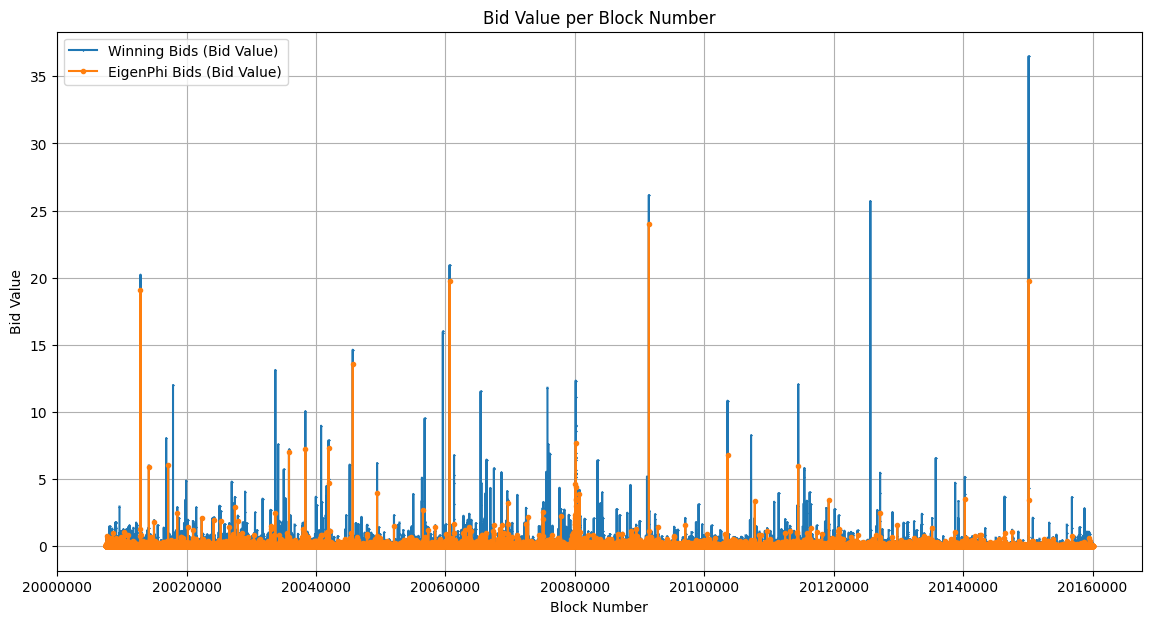

In [22]:


# 绘制线图：bid value per block number
plt.figure(figsize=(14, 7))

# 绘制 df_filtered 的线图
plt.plot(df_filtered['block_number'], df_filtered['value_in_eth'], label='Winning Bids (Bid Value)', marker='x', markersize=1)

# 绘制 df_value_max 的线图
plt.plot(df_value_max['block_number'], df_value_max['value_in_eth'], label='EigenPhi Bids (Bid Value)', marker='o', markersize=3)

# 添加标题和标签
plt.title('Bid Value per Block Number')
plt.xlabel('Block Number')
plt.ylabel('Bid Value')
plt.legend()
plt.grid(True)


plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))


# 显示图表
plt.show()


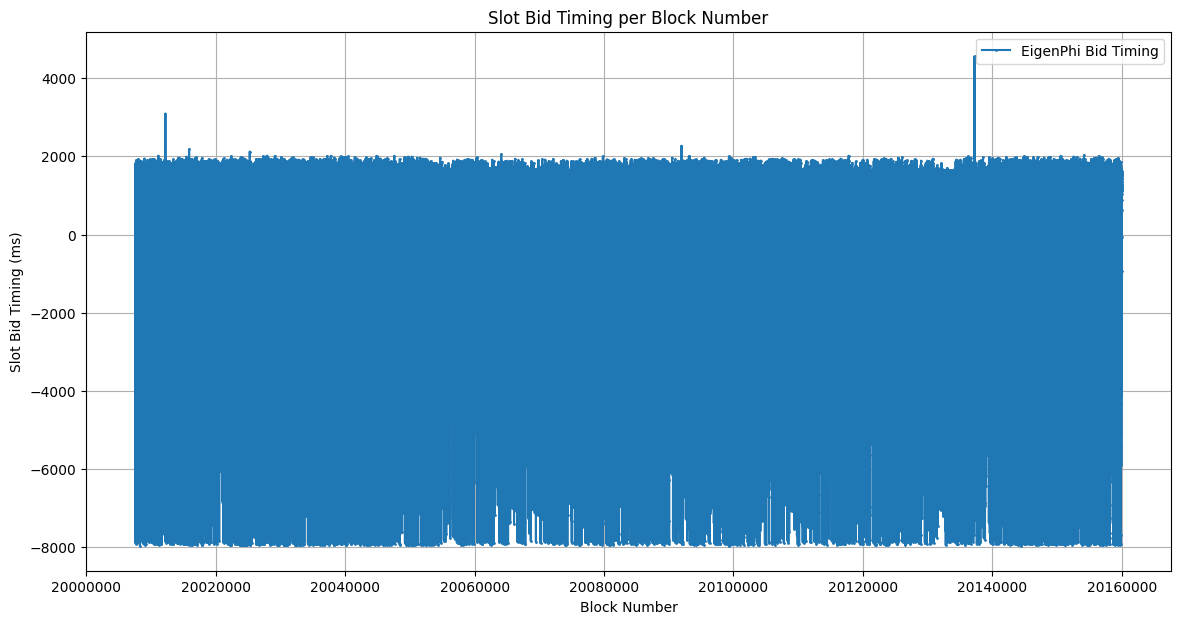

In [26]:


# 绘制线图并调整标记大小 Slot time per block number
plt.figure(figsize=(14, 7))

# 绘制 df_value_max 的线图 (使用 slot_t_ms 作为 y 轴)
plt.plot(df_value_max['block_number'], df_value_max['slot_t_ms'], label='EigenPhi Bid Timing', marker='o', markersize=1)

# # 绘制 df_filtered 的线图 (使用 slot_time_ms 作为 y 轴)
# plt.plot(df_filtered['block_number'], df_filtered['slot_t_ms_adjusted'], label='Winning Bid Timing', marker='x', markersize=1)

# 添加标题和标签
plt.title('Slot Bid Timing per Block Number')
plt.xlabel('Block Number')
plt.ylabel('Slot Bid Timing (ms)')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))


# 显示图表
plt.show()


In [ ]:
# # 检验指定日期和block number的数据
# import requests
# from bs4 import BeautifulSoup
# import zipfile
# import io
# import pandas as pd
# import re
# from data_prep_utils import *
# from plot_prep_utils import *

# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# df_builder = get_builder_info_from_latest_TLDR_talk()
# all_data = pd.read_csv('2024-06-24_all.csv')
# print(all_data["block_number"].min())

# df_1599 = all_data[all_data['block_number'] == 20159999]
# print(df_1599.shape[0])

# df_titan_builder = df_builder[df_builder['builder_label'] == 'Titan']

# df_titan_bids = df_1599[df_1599['builder_pubkey'].isin(df_titan_builder['builder_pubkey'])]

# print(df_1599.columns)

# plt.figure(figsize=(14, 7))

# # 绘制 df_value_max 的线图 (使用 slot_t_ms 作为 y 轴)
# plt.plot(df_titan_bids.index, df_titan_bids['slot_t_ms'], label=' Bids timing (slot_t_ms)', marker='o', markersize=1)

# # # 绘制 df_filtered 的线图 (使用 slot_time_ms 作为 y 轴)
# # plt.plot(df_filtered['block_number'], df_filtered['slot_time_ms'], label='Winning Bids (slot_time_ms)', marker='x', markersize=1)

# # 添加标题和标签
# plt.title('Bid Timings per Block Number')
# plt.xlabel('Block Number')
# plt.ylabel('Bid Timings (ms)')
# plt.legend()
# plt.grid(True)

# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))


# # 显示图表
# plt.show()